In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.precision", 2)

In [4]:
# for Jupyter-book, we copy data from GitHub. Locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
df = pd.read_csv(DATA_URL + "telecom_churn.csv")
pd.set_option('display.max_columns', 100)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
print(df.shape) # 3333 rows, 20 columns
print(df.columns) # columns names
print(df.info()) # general informations

(3333, 20)
Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int6

In [ ]:
df.describe() # statisical analysis of each numerical value
df.describe(include=["object", "bool"]) # to include non numerical values.

,State,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333
unique,51,2,2,2
top,WV,No,No,False
freq,106,3010,2411,2850


In [ ]:
df["Churn"].value_counts() # counts each occurence of the value
# df["Churn"].value_counts(normalize=True) # gives percentages

Churn
False    0.86
True     0.14
Name: proportion, dtype: float64

In [15]:
df.sort_values(by=["State", "Total day charge"], ascending=[True, False]).head() # sort by mutiple values at one time

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
95,AK,104,408,No,No,0,278.4,106,47.33,81.0,113,6.89,163.2,137,7.34,9.8,5,2.65,1,False
2265,AK,126,415,No,Yes,31,278.0,88,47.26,253.2,65,21.52,223.2,114,10.04,8.7,4,2.35,0,False
2367,AK,74,415,No,No,0,262.3,114,44.59,198.9,96,16.91,165.9,90,7.47,6.6,5,1.78,3,False
2902,AK,61,415,No,Yes,15,252.4,106,42.91,187.8,69,15.96,259.6,137,11.68,10.0,3,2.70,2,False
3241,AK,177,415,Yes,No,0,248.7,118,42.28,172.3,73,14.65,191.9,87,8.64,11.3,2,3.05,1,True


In [ ]:
df.select_dtypes(include=np.number)[df["Churn"] == 1].mean() # to get mean of all numerical values
df[df["Churn"] == 1]["Total day minutes"].mean()

206.91407867494823

DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The loc method is used for indexing by name, while iloc() is used for indexing by number.

In the first case below, we say “give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)”. In the second case, we say “give us the values of the first five rows in the first three columns” (as in a typical Python slice: the maximal value is not included).

In [ ]:
df.loc[0:5, "State":"Area code"]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [18]:
"""Applying fucntion to all a dataFrame or series"""
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                      True
dtype: object

In [19]:
# For example, if we need to select all states starting with ‘W’, we can do it like this:
df[df["State"].apply(lambda state: state[0] == "W")].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,False
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,False
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,False
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,True


The map method can be used to replace values in a column by passing a dictionary of the form {old_value: new_value} as its argument:

In [20]:
d = {"No": False, "Yes": True}
df["International plan"] = df["International plan"].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df = df.replace({"Voice mail plan": d})
df.head()
# You can do the same with the replec method. 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Grouping

Usually this is done this way in pandas: df.groupby(by=grouping_columns)[columns_to_show].function()
1. First, the groupby method divides the grouping_columns by their values. They become a new index in the resulting dataframe.
2. Then, columns of interest are selected (columns_to_show). If columns_to_show is not included, all non groupby clauses will be included.
3. Finally, one or several functions are applied to the obtained groups per selected columns.

In [32]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].describe()

Total day minutes                                                    \
                  count    mean    std  min     25%    50%     75%    max   
Churn                                                                       
False            2850.0  175.18  50.18  0.0  142.83  177.2  210.30  315.6   
True              483.0  206.91  69.00  0.0  153.25  217.6  265.95  350.8   

      Total eve minutes                                                    \
                  count    mean    std   min    25%    50%     75%    max   
Churn                                                                       
False            2850.0  199.04  50.29   0.0  164.5  199.6  233.20  361.8   
True              483.0  212.41  51.73  70.9  177.1  211.3  249.45  363.7   

      Total night minutes                                                      
                    count    mean    std   min     25%     50%     75%    max  
Churn                                                                          
False              2850.0  200.13  51.11  23.2  165.90  200.25  234.90  395.0  
True                483.0  205.23  47.13  47.4  171.25  204.80  239.85  354.9

In [29]:
# Let’s do the same thing, but slightly differently by passing a list of functions to agg():

columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]
df.groupby(["Churn"])[columns_to_show].agg(["mean", "std", "min", "max"])

Total day minutes                    Total eve minutes               \
                   mean    std  min    max              mean    std   min   
Churn                                                                       
False            175.18  50.18  0.0  315.6            199.04  50.29   0.0   
True             206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
         max                mean    std   min    max  
Churn                                                 
False  361.8              200.13  51.11  23.2  395.0  
True   363.7              205.23  47.13  47.4  354.9

## Pivot Tables
pivot_table method takes the following parameters:

values – a list of variables to calculate statistics for,

index – a list of variables to group data by,

aggfunc – what statistics we need to calculate for groups, e.g. sum, mean, maximum, minimum or something else.

In [33]:
df.pivot_table(
    ["Total day calls", "Total eve calls", "Total night calls"],
    ["Area code"],
    aggfunc="mean",
)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


# Inserting columns and values

In [ ]:
total_calls = (
    df["Total day calls"]
    + df["Total eve calls"]
    + df["Total night calls"]
    + df["Total intl calls"]
)
df.insert(loc=len(df.columns), column="Total calls", value=total_calls)
# loc parameter is the number of columns after which to insert the Series object
# we set it to len(df.columns) to paste it at the very end of the dataframe
df.head()

# or even better: no intermediary this way
df["Total charge"] = (
    df["Total day charge"]
    + df["Total eve charge"]
    + df["Total night charge"]
    + df["Total intl charge"]
)
df.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,359,52.09


In [37]:
# Delete column
df.drop(["Total charge", "Total calls"], axis=1, inplace=True)
# and here’s how you can delete rows
df.drop([1, 2]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False


# Making prediction
Trying the predict telecom churn with international option

In [ ]:
pd.crosstab(df["Churn"], df["International plan"], margins=True)
# Looks like if you have the international plan, 50% chance of leaving

International plan,False,True,All
Churn,,,
False,2664,186,2850
True,346,137,483
All,3010,323,3333


In [40]:
# some imports to set up plotting
import matplotlib.pyplot as plt

# !pip install seaborn
import seaborn as sns

# import some nice vis settings
sns.set()
# Graphics in the Retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

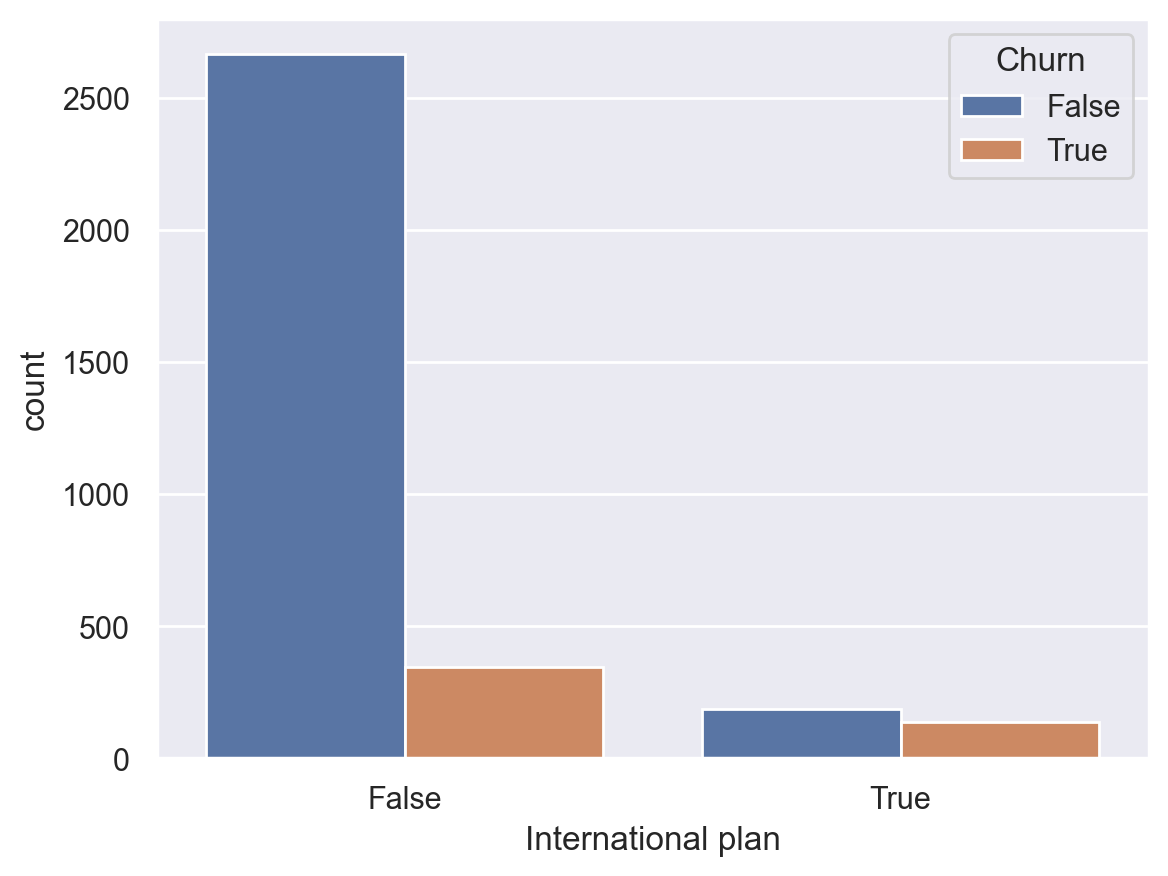

In [41]:
sns.countplot(x="International plan", hue="Churn", data=df);

In [44]:
pd.crosstab(df["Churn"], df["Customer service calls"], margins=True)


Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


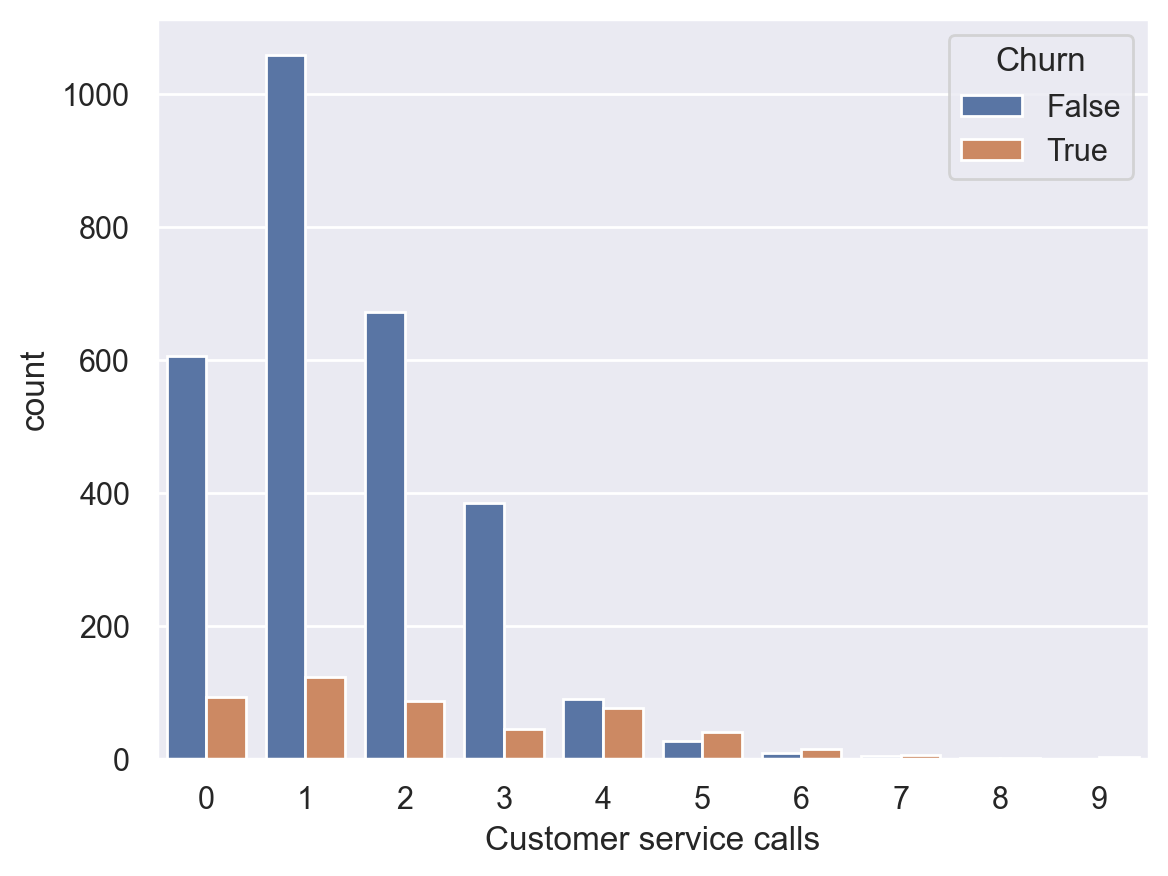

In [ ]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);
# Although it’s not so obvious from the summary table, 
# it’s easy to see from the above plot that the churn rate increases sharply from 4 customer service calls and above.

we can see that above 3 service calls, customers start churning
we can make a new column that is 1 for each row with number of customer calls > 3

In [46]:
df["Many_service_calls"] = (df["Customer service calls"] > 3).astype("int")

pd.crosstab(df["Many_service_calls"], df["Churn"], margins=True)

Churn,False,True,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


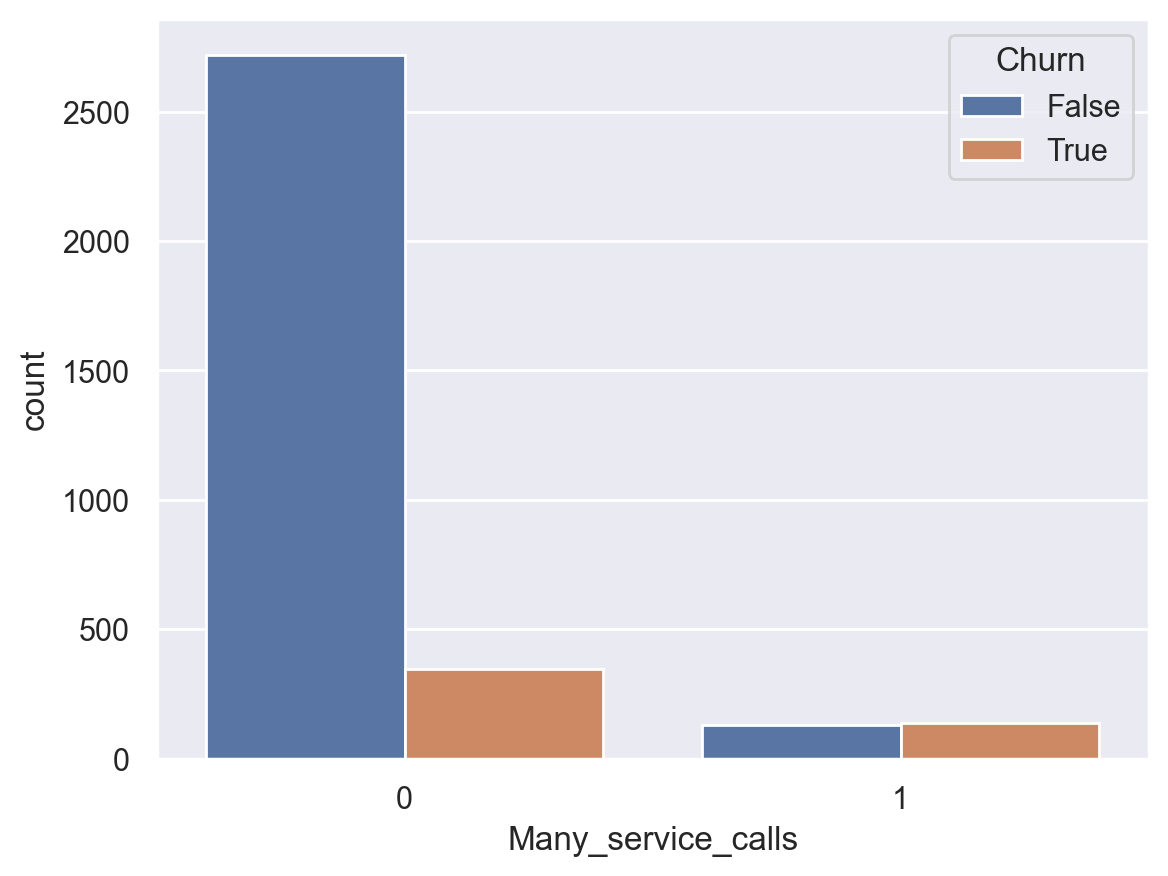

In [ ]:
sns.countplot(x="Many_service_calls", hue="Churn", data=df);
# here we see that if they have called the customer service many times, they will churn allmost every time

In [48]:
# we can cehck how this relate to the international plan
pd.crosstab(df["Many_service_calls"] & df["International plan"], df["Churn"], margins=True)

Churn,False,True,All
row_0,,,
False,2841,464,3305
True,9,19,28
All,2850,483,3333


With the help of a simple prediction that can be expressed by the following formula: International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0, we can expect a guessing rate of 85.8%, which is just above 85.5%. Subsequently, we’ll talk about decision trees and figure out how to find such rules automatically based only on the input data;